In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# DATADIR = "C:\Users\User\Desktop\Apam Lambung"

from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


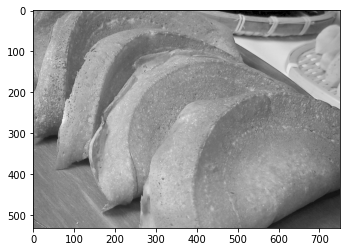

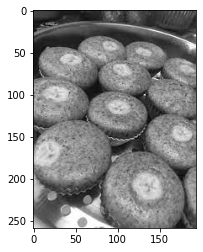

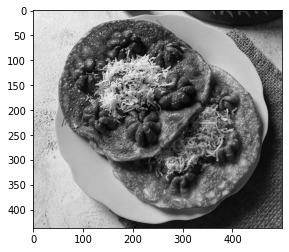

In [ ]:
DATADIR = "gdrive/MyDrive/Apam Image"

CATEGORIES = ["Apam balik", "Apam gula hangus", "Apam Lambung"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break

In [ ]:
print(img_array)

[[245 240 234 ...  21  22  22]
 [234 244 242 ...  19  20  21]
 [234 244 244 ...  19  20  21]
 ...
 [188 186 176 ... 143 139 113]
 [189 181 173 ... 144 157  87]
 [186 175 174 ... 158  86  77]]


In [ ]:
print(img_array.shape)

(437, 500)


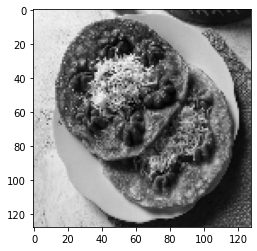

In [ ]:
IMG_SIZE = 128

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
from tqdm import tqdm
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print("")
print(len(training_data))

100%|██████████| 50/50 [00:15<00:00,  3.29it/s]


250


In [ ]:
import random

random.shuffle(training_data)

index = 1
for sample in training_data:
  print(str(index) + "->" + str(sample[1]))
  index = index + 1

In [ ]:
X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

In [ ]:
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
X = X/255.0

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

def create_model():
  model = Sequential()

  model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(256, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

  model.add(Dense(64))

  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

#model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 256)     2560      
_________________________________________________________________
activation_3 (Activation)    (None, 126, 126, 256)     0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 256)       590080    
_________________________________________________________________
activation_4 (Activation)    (None, 61, 61, 256)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 230400)           

In [ ]:
history = model.fit(X, y, validation_split=0.3, epochs=10, batch_size=50,)

Epoch 1/10
4/4 [==============================] - 55s 14s/step - loss: 42.2398 - accuracy: 0.6171 - val_loss: -196.7857 - val_accuracy: 0.5467
Epoch 2/10
4/4 [==============================] - 55s 14s/step - loss: -13.3891 - accuracy: 0.6114 - val_loss: -173.1617 - val_accuracy: 0.5467
Epoch 3/10
4/4 [==============================] - 55s 14s/step - loss: -22.0929 - accuracy: 0.6114 - val_loss: -210.8343 - val_accuracy: 0.5467
Epoch 4/10
4/4 [==============================] - 55s 14s/step - loss: -59.3340 - accuracy: 0.6171 - val_loss: -156.6420 - val_accuracy: 0.5333
Epoch 5/10
4/4 [==============================] - 55s 14s/step - loss: -66.5260 - accuracy: 0.6000 - val_loss: -171.9222 - val_accuracy: 0.5333
Epoch 6/10
4/4 [==============================] - 55s 14s/step - loss: -81.5095 - accuracy: 0.6114 - val_loss: -224.8043 - val_accuracy: 0.5467
Epoch 7/10
4/4 [==============================] - 55s 14s/step - loss: -106.0953 - accuracy: 0.6171 - val_loss: -252.9380 - val_accuracy:

Text(0.5, 0, 'epoch')

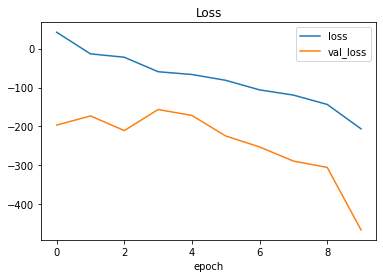

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

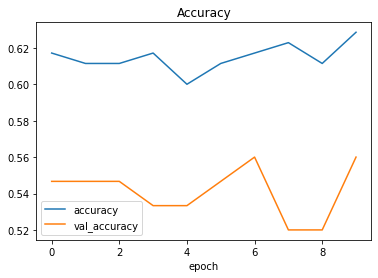

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
history = model.evaluate(X, y, verbose=1)

8/8 [==============================] - 20s 2s/step - loss: -333.3729 - accuracy: 0.6040


**Test for lecturer code**

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
import random

num_pixels = 128 * 128
num_classes = 3

def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = num_pixels,
                  activation = 'relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), #lr: learning rate
                loss='categorical_crossentropy', #loss function
               metrics=['accuracy'])
  return model

In [ ]:
model = create_model()
print(model.summary())

In [ ]:
history = model.fit(X, y, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)